In [1]:
# creating a time series data frame

In [2]:
import pandas as pd
df = pd.read_excel('1614069210_visibility.xlsx', index_col=0, parse_dates=True)
print(df)

                     visibility_km
2016-01-01 00:00:00       0.595456
2016-01-01 00:30:00       0.595456
2016-01-01 01:00:00       0.595456
2016-01-01 01:30:00       0.595456
2016-01-01 02:00:00       0.595456
...                            ...
2020-12-31 21:30:00       0.925370
2020-12-31 22:00:00       0.901230
2020-12-31 22:30:00       0.804670
2020-12-31 23:00:00       0.804670
2020-12-31 23:30:00       0.692016

[87696 rows x 1 columns]


In [3]:
# the data sheet is recorded from Jan 1 2016 to Dec 31 2020 for every half hour visibility index of the fog

In [4]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Time'] = df.index.time
df

,visibility_km,Year,Month,Day,Time
2016-01-01 00:00:00,0.595456,2016,1,1,00:00:00
2016-01-01 00:30:00,0.595456,2016,1,1,00:30:00
2016-01-01 01:00:00,0.595456,2016,1,1,01:00:00
2016-01-01 01:30:00,0.595456,2016,1,1,01:30:00
2016-01-01 02:00:00,0.595456,2016,1,1,02:00:00
...,...,...,...,...,...
2020-12-31 21:30:00,0.925370,2020,12,31,21:30:00
2020-12-31 22:00:00,0.901230,2020,12,31,22:00:00
2020-12-31 22:30:00,0.804670,2020,12,31,22:30:00
2020-12-31 23:00:00,0.804670,2020,12,31,23:00:00


In [5]:
df.index.time

array([datetime.time(0, 0), datetime.time(0, 30), datetime.time(1, 0),
       ..., datetime.time(22, 30), datetime.time(23, 0),
       datetime.time(23, 30)], dtype=object)

### time based indexing

In [6]:
df.loc['2016-01'].head()

,visibility_km,Year,Month,Day,Time
2016-01-01 00:00:00,0.595456,2016,1,1,00:00:00
2016-01-01 00:30:00,0.595456,2016,1,1,00:30:00
2016-01-01 01:00:00,0.595456,2016,1,1,01:00:00
2016-01-01 01:30:00,0.595456,2016,1,1,01:30:00
2016-01-01 02:00:00,0.595456,2016,1,1,02:00:00


In [7]:
### Data Visualization

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns
sns.set(rc = {
    'figure.figsize': (8,4)
})

<AxesSubplot:>

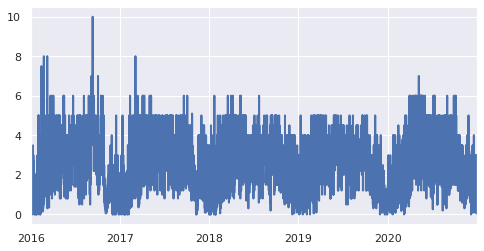

In [10]:
df['visibility_km'].plot(linewidth=2)

In [11]:
import numpy as np

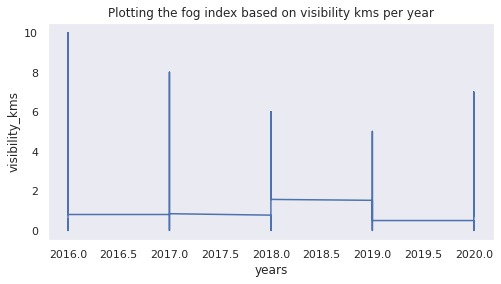

In [12]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(df['Year'], df['visibility_km'])

ax.set(xlabel='years', ylabel='visibility_kms',
       title='Plotting the fog index based on visibility kms per year')
ax.grid()

plt.show()

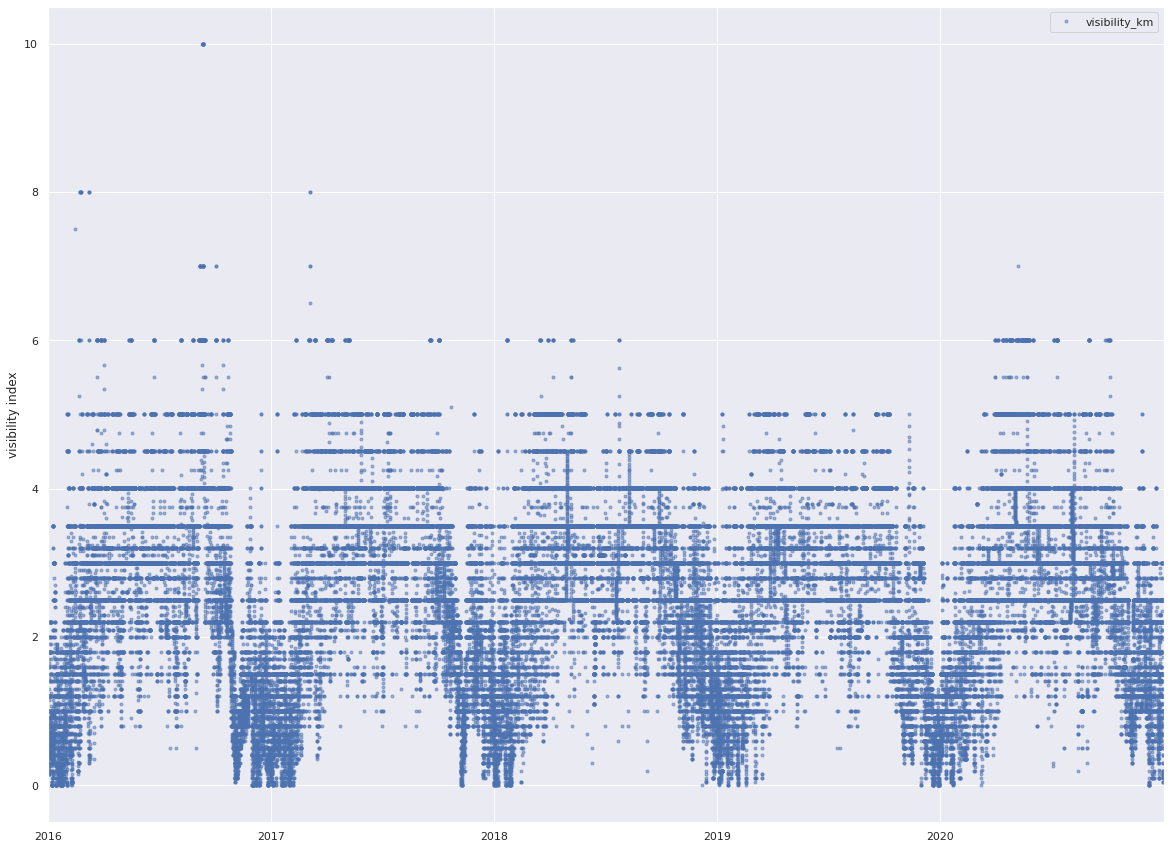

In [13]:
cols_plot = ['visibility_km']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('visibility index')

In [14]:
df['visibility_km'].max()

9.9940014

In [15]:
for i in range(len(df['visibility_km'])):
    if df['visibility_km'][i] == df['visibility_km'].max():
        print(df['Year'][i])

2016
2016
2016
2016
2016
2016
2016
2016
2016
2016


In [16]:
df['visibility_km'].loc['2016-09'].max()

9.9940014

In [17]:
df.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:30:00',
               '2016-01-01 01:00:00', '2016-01-01 01:30:00',
               '2016-01-01 02:00:00', '2016-01-01 02:30:00',
               '2016-01-01 03:00:00', '2016-01-01 03:30:00',
               '2016-01-01 04:00:00', '2016-01-01 04:30:00',
               ...
               '2020-12-31 19:00:00', '2020-12-31 19:30:00',
               '2020-12-31 20:00:00', '2020-12-31 20:30:00',
               '2020-12-31 21:00:00', '2020-12-31 21:30:00',
               '2020-12-31 22:00:00', '2020-12-31 22:30:00',
               '2020-12-31 23:00:00', '2020-12-31 23:30:00'],
              dtype='datetime64[ns]', length=87696, freq=None)

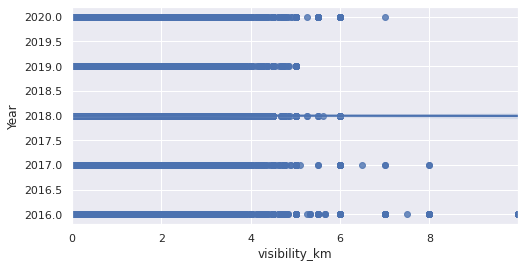

In [18]:
sns.regplot(x=df['visibility_km'], y=df['Year'])
plt.show()

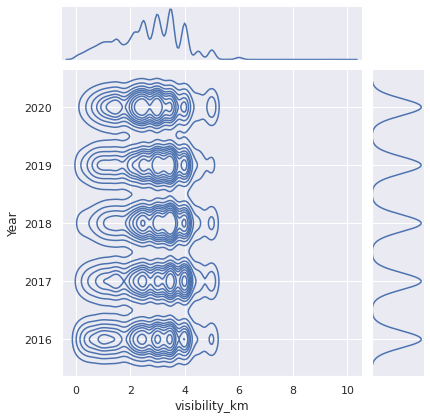

In [19]:
sns.jointplot(x=df['visibility_km'], y=df['Year'], kind="kde")

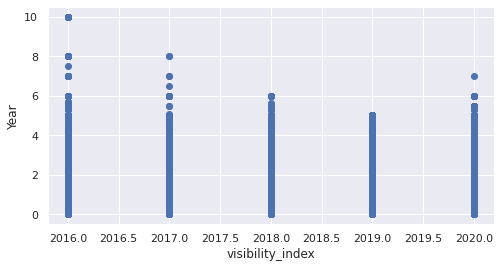

In [20]:
plt.scatter(df['Year'], df['visibility_km'])
plt.xlabel('visibility_index')
plt.ylabel('Year')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

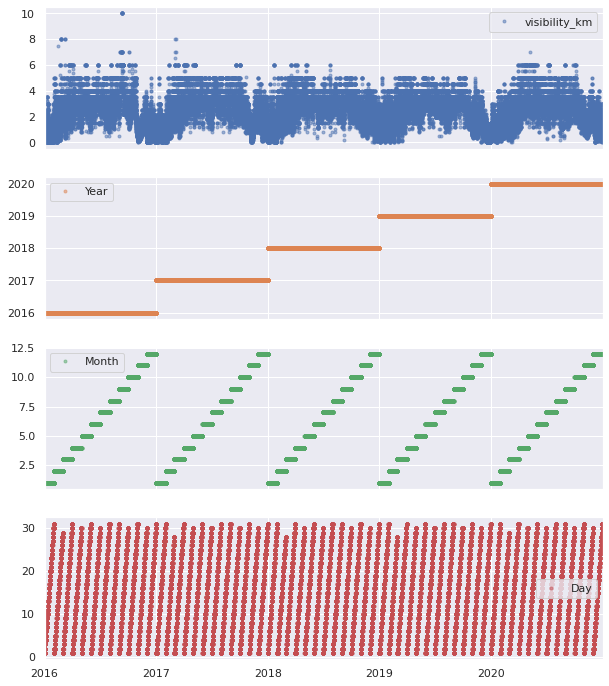

In [21]:
df.plot(marker='.', alpha=0.5, linestyle='None', figsize=(10, 12), subplots=True)

<AxesSubplot:xlabel='Year', ylabel='visibility_km'>

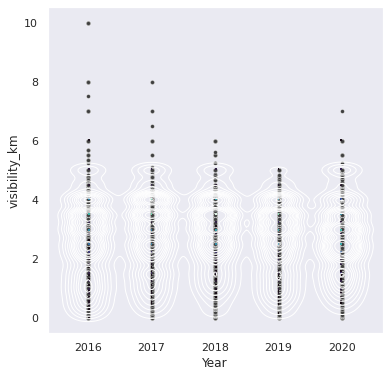

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=df['Year'], y=df['visibility_km'], s=15, color=".25")
sns.histplot(x=df['Year'], y=df['visibility_km'], bins=150, pthresh=.1, cmap="mako")
sns.kdeplot(x=df['Year'], y=df['visibility_km'], levels=15, color="w", linewidths=1)

In [23]:
df['visibility_km'].head()

2016-01-01 00:00:00    0.595456
2016-01-01 00:30:00    0.595456
2016-01-01 01:00:00    0.595456
2016-01-01 01:30:00    0.595456
2016-01-01 02:00:00    0.595456
Name: visibility_km, dtype: float64

In [24]:
# Estimate the mean and standard deviation of fog for each month, and show the result using a graph.

In [25]:
df.head()

,visibility_km,Year,Month,Day,Time
2016-01-01 00:00:00,0.595456,2016,1,1,00:00:00
2016-01-01 00:30:00,0.595456,2016,1,1,00:30:00
2016-01-01 01:00:00,0.595456,2016,1,1,01:00:00
2016-01-01 01:30:00,0.595456,2016,1,1,01:30:00
2016-01-01 02:00:00,0.595456,2016,1,1,02:00:00


In [26]:
np.mean(df['visibility_km'].loc['2016-01'])

0.9312162545026881

In [27]:
import statistics
statistics.mean(df['visibility_km'].loc['2016-1'])

0.9312162545026881

In [28]:
fog_records = df['visibility_km']
monthly_analysis = dict()

months = df['Month'].unique()
years = df['Year'].unique()

In [29]:
result = map(lambda month, year: statistics.mean(fog_records.loc[f'{year}-{month}']), months, years)
list(result)

[0.9312162545026881,
 2.1461792512011053,
 3.2517536674731176,
 3.2592711311111104,
 3.5403425063172036]

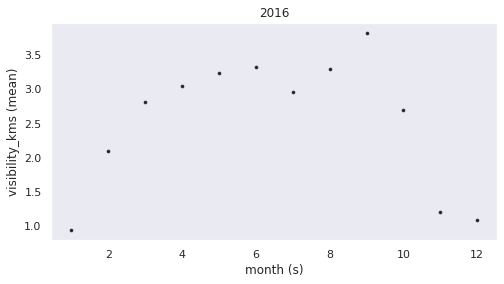

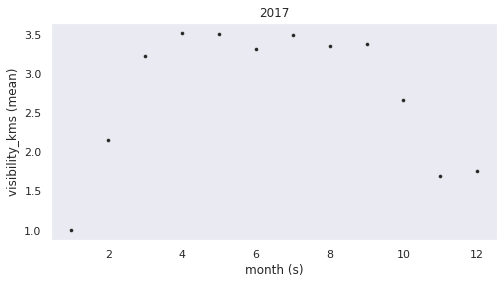

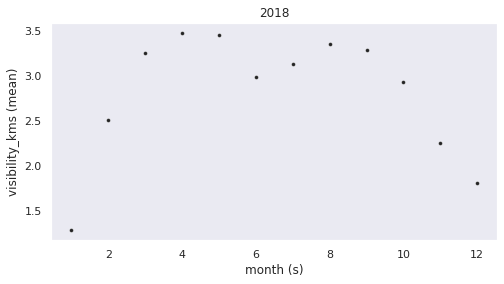

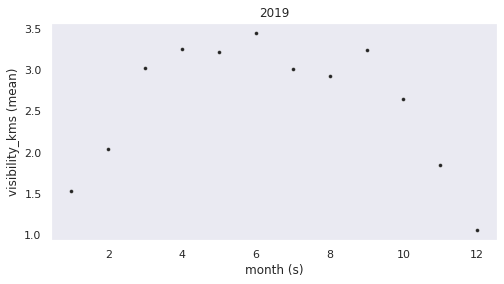

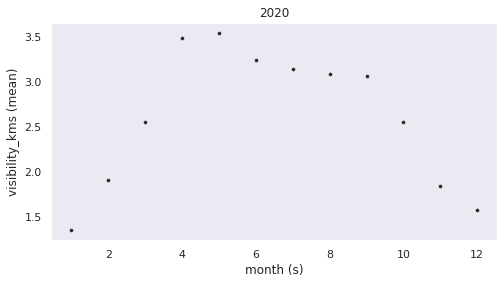

In [30]:
for i in range(len(years)):
    year = years[i]
    mean_s = []
    for j in range(len(months)):
        mean = np.mean(fog_records.loc[f'{years[i]}-{months[j]}'])
        mean_s.append(mean)
        
    
    fig, ax = plt.subplots()
    # ax.scatter(months, mean_s)
    sns.scatterplot(x=months, y=mean_s, s=15, color=".15")
    ax.set(xlabel='month (s)', ylabel='visibility_kms (mean)',
           title=f'{year}')
    plt.show()
    
        # print(years[i], months[j], statistics.mean(fog_records.loc[f'{years[i]}-{months[j]}']))

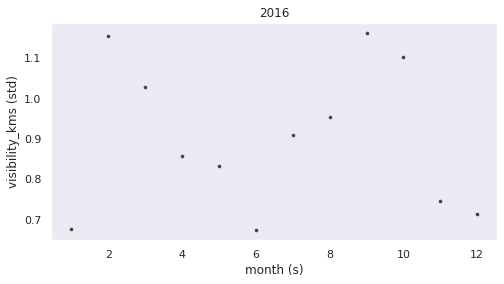

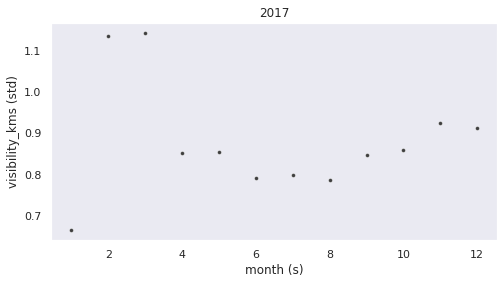

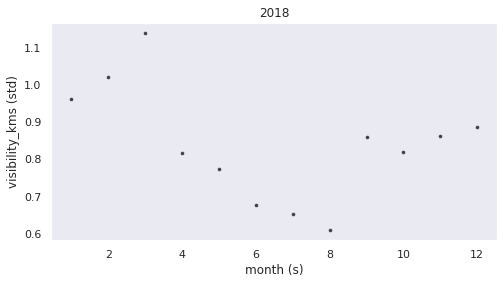

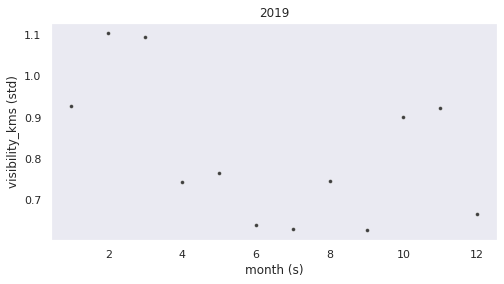

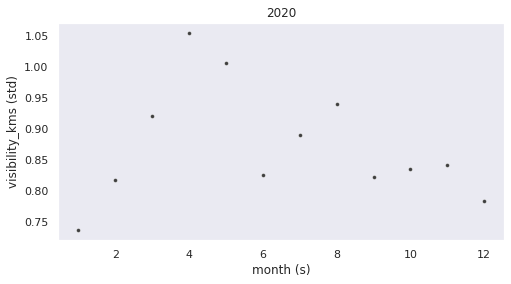

In [31]:
for i in range(len(years)):
    mean_si = []
    year = years[i]
    for j in range(len(months)):
        # print(years[i], months[j], np.std(fog_records.loc[f'{years[i]}-{months[j]}']))
        mean_i = np.std(fog_records.loc[f'{years[i]}-{months[j]}'])
        mean_si.append(mean_i)
        
    fig, ax = plt.subplots()
    # ax.scatter(months, mean_s)
    sns.scatterplot(x=months, y=mean_si, s=15, color=".25")
    ax.set(xlabel='month (s)', ylabel='visibility_kms (std)',
           title=f'{year}')
    plt.show()

In [32]:
#A fog event begins when the visibility falls below 1 km and ends when it exceeds 1 km. For the given data,
# (a) identify the number of fog-events
# (b) calculate the duration of each fog-event.

In [33]:
df['visibility_km'].loc['2016-1'].head()

2016-01-01 00:00:00    0.595456
2016-01-01 00:30:00    0.595456
2016-01-01 01:00:00    0.595456
2016-01-01 01:30:00    0.595456
2016-01-01 02:00:00    0.595456
Name: visibility_km, dtype: float64

In [34]:
df['visibility_km'].loc['2016-1'].tail()

2016-01-31 21:30:00    1.995582
2016-01-31 22:00:00    1.995582
2016-01-31 22:30:00    1.995582
2016-01-31 23:00:00    1.899021
2016-01-31 23:30:00    1.802461
Name: visibility_km, dtype: float64

In [35]:
df.loc['2016-01']

,visibility_km,Year,Month,Day,Time
2016-01-01 00:00:00,0.595456,2016,1,1,00:00:00
2016-01-01 00:30:00,0.595456,2016,1,1,00:30:00
2016-01-01 01:00:00,0.595456,2016,1,1,01:00:00
2016-01-01 01:30:00,0.595456,2016,1,1,01:30:00
2016-01-01 02:00:00,0.595456,2016,1,1,02:00:00
...,...,...,...,...,...
2016-01-31 21:30:00,1.995582,2016,1,31,21:30:00
2016-01-31 22:00:00,1.995582,2016,1,31,22:00:00
2016-01-31 22:30:00,1.995582,2016,1,31,22:30:00
2016-01-31 23:00:00,1.899021,2016,1,31,23:00:00


In [36]:
df['Duration'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df

,visibility_km,Year,Month,Day,Time,Duration
2016-01-01 00:00:00,0.595456,2016,1,1,00:00:00,0
2016-01-01 00:30:00,0.595456,2016,1,1,00:30:00,0
2016-01-01 01:00:00,0.595456,2016,1,1,01:00:00,1
2016-01-01 01:30:00,0.595456,2016,1,1,01:30:00,1
2016-01-01 02:00:00,0.595456,2016,1,1,02:00:00,2
...,...,...,...,...,...,...
2020-12-31 21:30:00,0.925370,2020,12,31,21:30:00,21
2020-12-31 22:00:00,0.901230,2020,12,31,22:00:00,22
2020-12-31 22:30:00,0.804670,2020,12,31,22:30:00,22
2020-12-31 23:00:00,0.804670,2020,12,31,23:00:00,23


In [37]:
fog_event_counter = 0
duration = []
timer = []
for i in range(len(years)):
    year = years[i]
    fog_event = 0
    for j in range(len(months)):
        month = months[j]
        if (fog_records.loc[f'{years[i]}-{months[j]}'].empty == False):
            if (fog_records.loc[f'{years[i]}-{months[j]}'] < 1).any():
                fog_event = 1
                continue
            elif (fog_records.loc[f'{years[i]}-{months[j]}'] > 1).any():
                fog_event_counter += fog_event
                duration.append(df["Duration"].loc[f"{year}-{month}"])
                timer.append(df["Time"].loc[f"{year}-{month}"])
                break
    fog_event_counter += fog_event_counter

In [38]:
# Five years of visibility data for a site is attached. Analyze the data to answer the following questions. Plot graphs or tables to support your answer.
# Q1. Which months are likely to have fog?
# Q2. What is the usual time in a day for a fog event to start?
# Q3. What is the usual (average) duration of a fog event?
# Q4. The number of fog events at the site has increased or decreased during the last five years.

### Q1:
- Based on the graph for means of different months in the years from 2016 - 2020 we infer that the following months have possibility of incurring fog:
    * 2016: June, August and September
    * 2017: April, May, July, August and September
    * 2018: April, May, August, September
    * 2019: May, June, August, September
    * 2020: April, May, June, July
    
- `April`,`May`, `June`, `August`, `September` months have high possibility of fog occurrence

In [39]:
### Q2:
import datetime
for i in range(len(timer)):
    max_timer = timer[i].max()

### Approximately the usual time for a fog event to start is `11am`


In [40]:
### Q3:
### Based on the mean of the fog event data we have:
sum = 0
for i in range(len(duration)):
    sum += statistics.mean(duration[i])
fog_event_duration = sum/len(duration)

### Approximately the time of fog_event occurrence is `11 minutes and 30 seconds`

### Q4:
Based on the graph trends, it's obvious that the fog events have decreased significantly probably because of the increasing temperatures.